# Изучение закономерностей, определяющих успешность игр

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры.
<br> Из открытых источников нам доступны исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах. 
<br>Нам необходимо определиться с планом продаж и рекламы на следующий год для этого нам нужно  выявить закономерности успешности игры.
<br> В данном проекте мы выявим самые популярные игровые платформы, а также потенциально прибыльные. Узнаем есть ли зависимость между количеством продаж и оценками критиков и игроков. Построим портрет пользователя для каждого региона и проверим гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC,  а также о равенстве пользовательских рейтингов жанров Action и Sports.


## Изучение предоставленной информации

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns 
pd.options.display.float_format = '{:,.2f}'.format

import plotly.io as pio
pio.renderers.default = "png"
#импорт библиотек


Откроем предоставленный файл.

In [ ]:
df = pd.read_csv("/datasets/games.csv") #открытие Csv файла
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Описание данных
 - `Name` — название игры
 - `Platform` — платформа
 - `Year_of_Release` — год выпуска
 - `Genre` — жанр игры
 - `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
 - `EU_sales` — продажи в Европе (миллионы проданных копий)
 - `JP_sales` — продажи в Японии (миллионы проданных копий)
 - `Other_sales` — продажи в других странах (миллионы проданных копий)
 - `Critic_Score` — оценка критиков (максимум 100)
 - `User_Score` — оценка пользователей (максимум 10)
 - `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
<br>Данные за 2016 год могут быть неполными.

In [ ]:
df.info()#вывод информации по датафрейму

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных

Первым делом приведем к нижнему реестру наименования столбцов в таблице.

In [ ]:
df.columns = map(str.lower, df.columns)
#приведение наименования столбцов к нижнему регистру
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
df['user_score'].unique()#уникальные значения оценок пользователей

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В привычных дня нас цифровых отображениях оценок затесался `tbd`, который не позволит нам поменять тип данных в столбце. Разберемся, что же такое `tbd`. <br> `tbd` расшифровывается как `To Be Determined`, т.е. `Будет определено`. Это значит, что на данный момент нет данных об оценках пользователей. Поэтому смело заменим `tbd` на `Nan`

In [ ]:
df.loc[df['user_score'] =='tbd','user_score'].count()#подсчет tbd в столбце

2424

In [ ]:
df['user_score'] = df['user_score'].replace('tbd', np.nan) #замена tbd на Nan

In [ ]:
df['user_score'] = df['user_score'].astype('float64', errors='ignore') 
#замена типа данных столбца user_score с игнорированием ошибок(Nan)
df['year_of_release'] = df['year_of_release'].astype('Int64', errors='ignore')
#замена типа данных столбца year_of_release с игнорированием ошибок(Nan)
df.info()#вывод информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Ранее мы обнаружили `nan` в столбцах: 
- `name` - 2 пропуска
- `year_of_release` - 269 пропусков
- `genre` - 2 пропуска
- `critic_score`- 8 137 пропусков
- `user_score` - 9 125 пропусков
- `rating`- 6 766 пропусков.
<br> 
<br> Рассмотрим пропуски в столбце `name` подробнее.

In [ ]:
df[df['name'].isna()] #вывод Nan в стодбце name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Мы видим, что две строки с пропусками в столбце `name` так же имеют пропуски в столбце `genre`, думаю, что мы можем удалить эти строки, так как нужной информации в этих строках для нас не содержится, а процент от общего датафрейма очень мал.

In [ ]:
df = df.dropna(subset=['name']).reset_index(drop=True)#удаление строк с пропусками в name
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В столбцах: `year_of_release`, `critic_score`, `user_score`,`rating`- нет возможности заменить пропуски на другие значения, потому что это может привести к искажению данных. А вот столбец `rating` рассмотрим более подробно.

In [ ]:
df['rating'].unique()#вывод уникальных значений в rating

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Итак, по информации из интернет-сети :
 - `EC`	- для детей младшего возраста
 - `M`	- подходит для лиц старше 17 лет.
 - `E`	подходит для всех возрастных категорий
 - `T` - 	подходит для лиц старше 13 лет
 - `E10+` - подходит для лиц старше 10 лет
 - `K-A` - lля детей – для тех, кто уже научился говорить и держать джойстик, эти игры уже могут вызывать интерес `Е` 
 - `AO`	 - подходит для взрослых старше 18 лет
 - `RP`	 - категория ещё не присвоена
<br> В данном случае, считаю, что значения `nan` уместнее всего было бы заменить на `RP`, т.к. и в том, и в другом случае классификация игра нам не известна. 

In [ ]:
df['rating'] = df['rating'].fillna('RP')#замена Nan в столбце rating на RP
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Добавим столбец, в котором выведем общую сумму 

In [ ]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] 
#добавление нового столбца с общей суммой продаж 
df = df[['name', 'platform','year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales','total_sales','critic_score','user_score','rating']]
#смена столбцов местами
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.00,8.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,RP
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.00,8.30,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.00,8.00,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,RP


Мы обработали предоставленные данные, переименовали столбцы, удалили или заменили значения `Nan`. В итоге у нас получился датафрейм на основе которого мы будем строить анализ в дальнейшем.

## Исследовательский анализ данных

In [ ]:
df_1 = df.pivot_table(index='year_of_release', values='name', aggfunc='count').rename(columns={'name':'count_games'})
#создание сводной таблицы с оличеством выпускаемых игр по годам
df_1

,count_games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


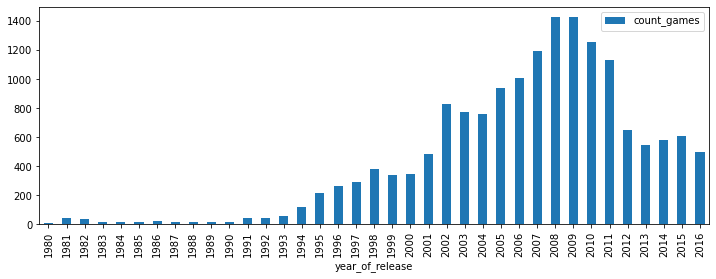

In [ ]:
df_1.plot(y='count_games', kind='bar', figsize=(12, 4)) #построение гистограммы количества выпущенных игр по годам
plt.show()

С 1980 по 1993 год количество выпускаемых игр примерно одинаково, а с 1994 года количество игр стало быстро расти. Своего пика рост достигает в 2008-2009хх годах и далее идет на спад. С этим графиком можно сопоставить историю развития игр. Их популяризация с 1993 по 2010 и дальнейшая их спад в связи с развитием и набором популярности мобильных игр. 

### ТОП - 5 игровых платформ

In [ ]:
top_5 = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
top_5.columns = ['total_sales_platform']
top_5 = top_5.sort_values('total_sales_platform', ascending=False).head(5)
#создание таблицы c максимальными продажами по платформам(Топ 5)
top_5

,total_sales_platform
platform,
PS2,"1,255.77"
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


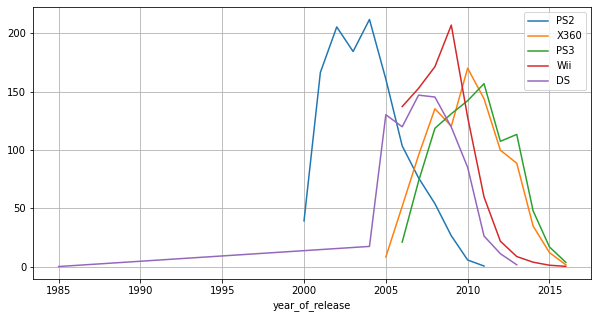

In [ ]:
for  i in top_5.index:
     (
         df.query('platform == @i')
              .groupby('year_of_release')['total_sales']
              .sum().plot(label =i,legend=True, figsize=(10,5),grid =('m'))
     )#построение графиков продаж на Топ-5 платформах по годам

На графике мы видим, что самой "старой" платформой из Топ-5 является `DS`. с 1985 года платформа очень низкими темпами развивалась, в 2004 у платформы наблюдается резкий рост, но после 2013 года платформа больше не выпускала игры. Т.е. можно сказать, что основная жизнедеятельность платформы была в 2004-2013 гг.<br> `PS2` начала выпускать игры в 2000 году, а в 2011 прекратила. На смену ей в 2006 году пришла `PS3`, а к 2016, как видно на графике продажи приблизились к 0. <br>Вместе с `PS4` в 2006 году на графике появляется платформа `Wii`, а уже к 2015-2016 годам приблизилась к 0. <br> В 2015 году мы видим появление игр на платформе `X360`, в 2010 годы был пик по продажам игр на платформе, но к 2016 году продажи приблизились к отметке 0. <br> Просмотрев графики по 5 самым прибыльным платформам, можно прийти к выводу, что в среднем жизненный цикл платформы около 10 лет. Самые пиковые продажи для платформ длятся в среднем 4 года. Возьмем информацию за последние 4 года для планирования компании на 2017 год.


### Потенциально прибыльные платформы

Создадим отдельную таблицу, включающую в себя данные только за года с 2013 по 2016.

In [ ]:
df_new = df[df['year_of_release'] >= 2013].reset_index(drop=True)#создание таблицы с данными с 2013 по 2016 годы
platform = df_new['platform'].unique() #переменная уникальными значениями платформ
df_new.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97.00,8.20,M
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97.00,8.10,M
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,RP
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,NaN,NaN,RP
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.00,8.30,M
5,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,11.68,NaN,NaN,RP
6,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,10.24,73.00,2.60,M
7,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,9.36,71.00,2.60,M
8,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,9.18,NaN,NaN,RP
9,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82.00,4.30,E


Построим графики с поведением продаж, но для того, что не пропустить только набирающие обороты игры или не перепутать уже идущие на спад игры с теми, что набирают рос, возьмем данные за последние 10 лет.

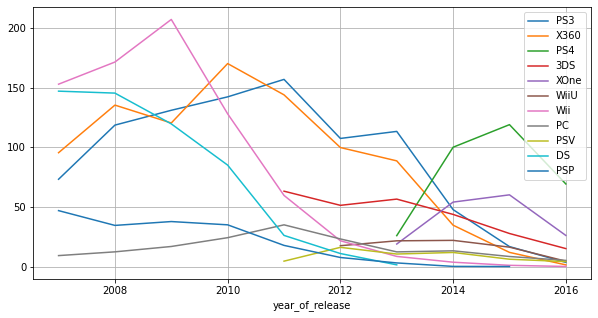

In [ ]:
for  i in platform:
     (
         df.query('platform == @i and year_of_release >=2007')
              .groupby('year_of_release')['total_sales']
              .sum().plot(label =i,legend=True, figsize=(10,5),grid =('m'))
     ) #вывод графиков с информацией о продажах на платформах по годам за последние 10 лет

 На графике видно, что роста в 2016 году, ни по одной платформе нет, возможно, это из-за того, что данные за 2016 год предоставлены не полностью.
<br>В 2013 году продажи запусти платформы PS4 и XOne. WiiU начала продажи в 2012, а в 2011 3DS. PS3 и X360 имеют не плохие продажи, но платформы существуют уже продолжительное время и продажи пошли на спад. 
<br> Выведем "диаграмму с усами" за период 2013 по 2016 года.

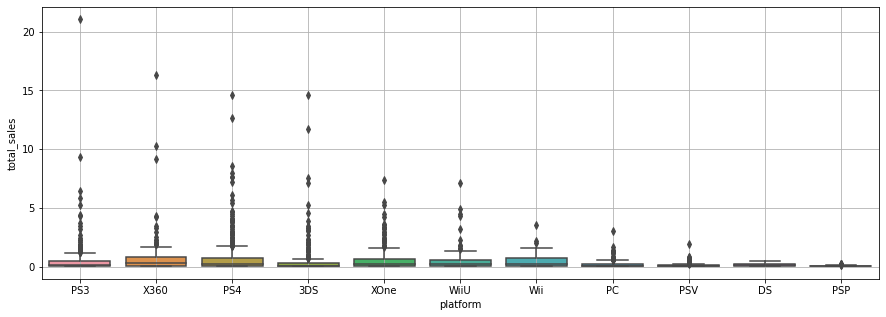

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_new, x='platform', y='total_sales')
plt.grid('m')#построение диаграммы с усами

На диаграмме размаха большого масштаба мы сможем увидеть, что  у большинства платформ имеются выбросы в данных, но о самих "ящиках" сложно что-то сказать. Посмотрим на эту же диаграмму, но с установим лимиты на ось Y

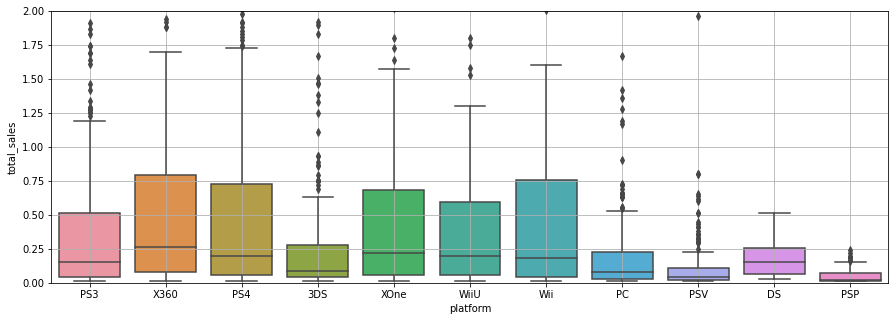

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_new, x='platform', y='total_sales')
plt.ylim(0, 2)
plt.grid('m')#построение масштабированной диаграммы с усами

Итак, на диаграммах размаха видно, что самые высокие медианы у платформ: `X360`, `XOne`,`PS4`,`WiiU`, `Wii`, `PS3`. Эти платформы и будем рассматривать как потенциально прибыльные. Если взять во внимание так же представленный выше график, к полученному списку я бы добавила `3DS`, т.к. платформа довольно новая и на 2016 год имеет продажи сравнимые с `XOne`,а вот  `Wii` я бы из списка исключила, т.к к 2016 году продажи по ней практически сравнялись с 0.  <br> Создадим переменную `potential_platform` в которой будут перечислены выбранные нами потенциально прибыльные платформы.

In [ ]:
potential_platform = ['PS4', 'XOne', '3DS', 'WiiU', 'PS3','X360']
#создание переменной с выбранными потенциально прибыльными платформами

### Выявление зависимости продаж от отзывов пользователей и критиков

Выявим влияют ли оценки пользователей и критиков на продажи по выбранным нами потенциально прибыльным платформам, для этого сохраним в переменную `df_potential_platform` срез с данными за последние 4 года по платформам, которые считаем что принесут нам прибыль.

In [ ]:
df_potential_platform = (
    df_new.query('platform == @potential_platform')
    .reset_index(drop=True)
)#создание среза данных по платформам из переменной potential_platform
df_potential_platform.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97.00,8.20,M
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97.00,8.10,M
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,RP
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,NaN,NaN,RP
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.00,8.30,M


Посчитаем коэффициент корреляции и построим диаграмму рассеяния по платформе `PS4`.

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Коэффициент корреляции 0.41


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

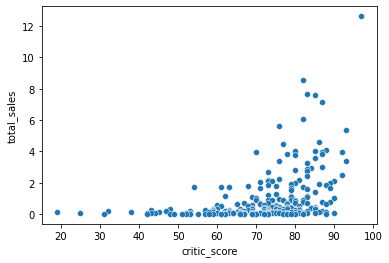

In [ ]:
(
    print('Коэффициент корреляции', round(df_potential_platform.query('platform == "PS4"')['critic_score']
    .corr(df_potential_platform.query('platform == "PS4"')['total_sales']),2))
)#коэффициент корреляции для PS4
(
    sns.scatterplot(data = df_potential_platform, x = df_potential_platform
                    .query('platform == "PS4"')['critic_score'], y = df_potential_platform
                    .query('platform == "PS4"')['total_sales'])
)
plt.show()
#диаграмма рассеяния 

На диаграмме видно, что зависимость продаж платформы `PS4` от оценки критиков имеется, пусть и не самая сильная. <br> Рассмотрим диаграмму рассеяния по оценке пользователей.

Коэффициент корреляции -0.03


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

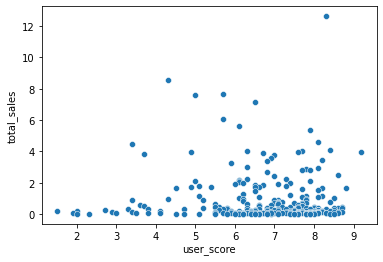

In [ ]:
(
    print('Коэффициент корреляции',round(df_potential_platform.query('platform == "PS4"')['user_score']
    .corr(df_potential_platform.query('platform == "PS4"')['total_sales']),2))
)#коэффициент корреляции для PS4
(
    sns.scatterplot(data = df_potential_platform, x = df_potential_platform
                    .query('platform == "PS4"')['user_score'], y = df_potential_platform
                    .query('platform == "PS4"')['total_sales'])
)
plt.show()#диаграмма рассеяния 

Коэффициент корреляции и диаграмма показывают нам, что зависимость продаж по платформе `PS4` от оценки пользователей отсутствует. 
<br> Рассмотрим зависимости этих же показателей для остальных платформ, вошедших в наш список потенциально прибыльных.

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
#Удалитьdf_potential_platform.pivot_table(index='platform', values=['user_score','total_sales'], aggfunc='corr')

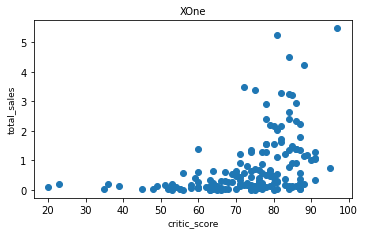

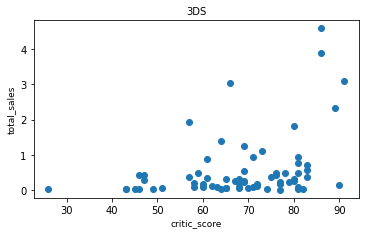

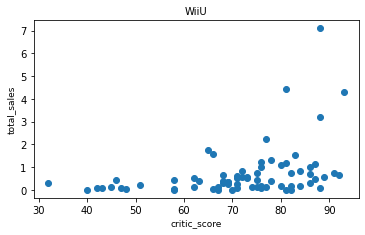

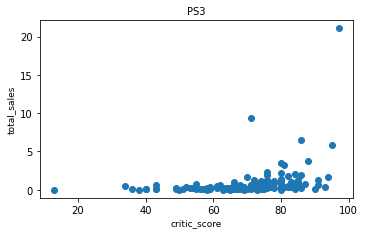

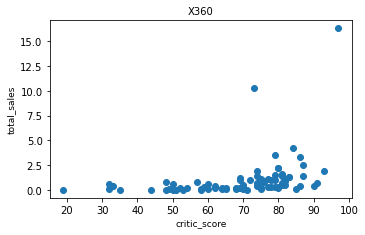

In [ ]:
potential_platform_corr =  ['XOne', '3DS', 'WiiU', 'PS3', 'X360'] 
#создание переменной для построения диаграмм 
for name in potential_platform_corr: #создание цикла for для построения диаграмм
    
    x = df_potential_platform[df_potential_platform['platform']==name ]['critic_score']
    y = df_potential_platform[df_potential_platform['platform']==name ]['total_sales']
    
    
    fig = plt.figure(figsize=(5, 3))
    ax = fig.add_subplot(111)
    ax.scatter(x, y)
    plt.tight_layout(w_pad=3)
    
    
    ax.set_title(name, fontsize=10)
    ax.set_xlabel('critic_score', fontsize=9)
    ax.set_ylabel('total_sales', fontsize=9)   

In [ ]:
corr_critic_score = df_new.pivot_table(index='platform', values=['critic_score','total_sales'], aggfunc='corr')
corr_critic_score = (
    corr_critic_score.drop('total_sales', 1).reset_index()
        .query('level_1 != "critic_score" and level_1 != "user_score" and platform in @potential_platform_corr')
                     .rename (columns= {'level_1': 'name'}).reset_index(drop=True)
) #создание таблицы с коэф. корреляции 
corr_critic_score

,platform,name,critic_score
0,3DS,total_sales,0.36
1,PS3,total_sales,0.33
2,WiiU,total_sales,0.38
3,X360,total_sales,0.35
4,XOne,total_sales,0.42


Мы видим, что коэффициент корреляции колеблется от 0,33 до 0,42. Так же на диаграммах видно, что зависимость продаж от оценки критиков присутствует.
<br> Проверим зависимость от оценки пользователей.

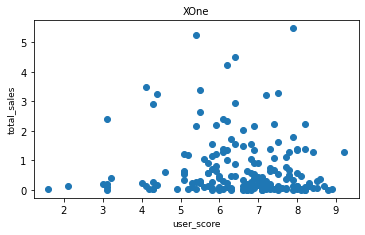

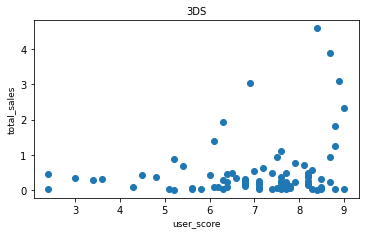

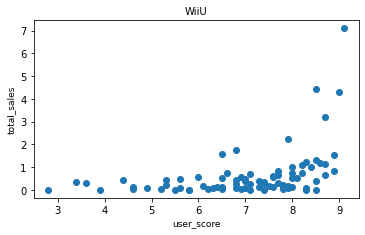

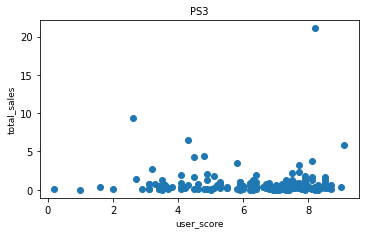

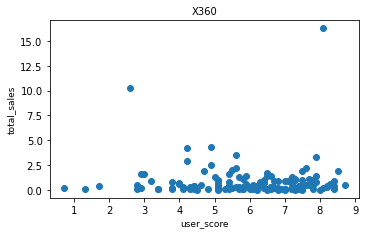

In [ ]:
for name in potential_platform_corr: #создание цикла for для построения диаграмм
    
    x = df_potential_platform[df_potential_platform['platform']==name]['user_score']
    y = df_potential_platform[df_potential_platform['platform']==name]['total_sales']
    
    fig = plt.figure(figsize=(5, 3))
    ax = fig.add_subplot(111)
    ax.scatter(x, y)
    plt.tight_layout(w_pad=3)
    
    ax.set_title(name, fontsize=10)
    ax.set_xlabel('user_score', fontsize=9)
    ax.set_ylabel('total_sales', fontsize=9)

In [ ]:
corr_user_score = df_new.pivot_table(index='platform', values=['user_score','total_sales'], aggfunc='corr')
corr_user_score = (
    corr_user_score.drop('total_sales', 1).reset_index()
        .query('level_1 != "critic_score" and level_1 != "user_score" and platform in @potential_platform_corr')
                   .rename (columns= {'level_1': 'name'}).reset_index(drop=True)
)#создание таблицы с коэф. корреляции 
corr_user_score

,platform,name,user_score
0,3DS,total_sales,0.24
1,PS3,total_sales,0.00
2,WiiU,total_sales,0.42
3,X360,total_sales,-0.01
4,XOne,total_sales,-0.07


Мы видим что для `PS3`, `X360`, `XOne` зависимость почти отсутствует, а вот для `3DS` и `WiiU` зависимость, хоть и не очень большая, но имеется.
<br> `X360` и `XOne` это американские платформы, `PS3` - выпускается японской компанией *Sony*, но расcчитана больше на зарубежные рынки. `3DS`и `WiiU` платформы производства *Nintendo*, которая, так же, является японской компанией, и по ним мы наблюдаем зависимость продаж от оценки геймеров-пользователей. Возможно, пользователи игр *Nintendo* выбирают игры на основе не только рейтинга критиков, но и рейтинга обычных пользователей.

### ТОП - 5 игровых жанров

Найдем ТОП-5 самых популярных игровых жанров за период с 2013 года по 2016 год.

In [ ]:
top_genre = (
    df_new.pivot_table(index='genre', values=['total_sales'], aggfunc='sum')
             .sort_values('total_sales', ascending=False).head(5)
            ) #Создание сводной таблицы с жанрами игр и общими продажами

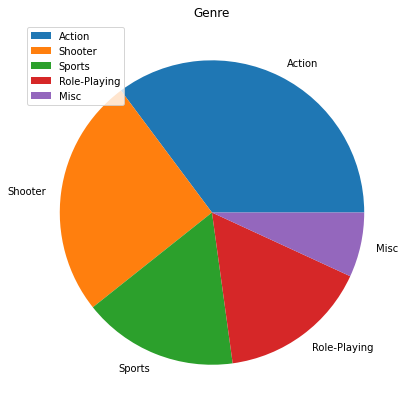

In [ ]:
top_genre.plot(kind='pie', subplots=True, figsize=(7, 7)) #круговая диаграмма построенная по популярности жанров
plt.title("Genre")
plt.legend(loc=2)
plt.ylabel("")
plt.show()

In [ ]:
top_genre.head(5)#вывод 5 самых популярных жанров

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82


Самым популярным жанром, с приличным отрывом, является `Action`. Замыкает пятерку самых востребованных жанров `Misc`. А вот мне нравится собирать пазлы, ну или строить домики в Sims4.

Рассмотрим медианные значения игровых жанров.

In [ ]:
top_genre_mean = (
    df_new.pivot_table(index='genre', values=['total_sales'], aggfunc='mean')
             .sort_values('total_sales', ascending=False).head(5)
            ) #Создание сводной таблицы с жанрами игр и общими продажами
top_genre_mean.head(5)

,total_sales
genre,
Shooter,1.25
Sports,0.70
Platform,0.58
Role-Playing,0.50
Racing,0.47


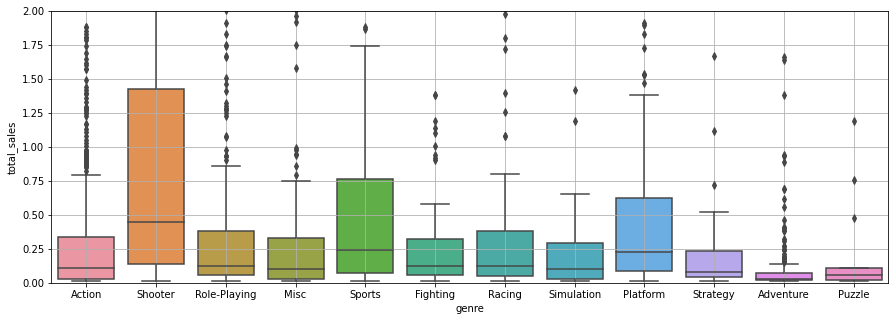

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_new, x='genre', y='total_sales')
plt.ylim(0, 2)
plt.grid('m')#построение масштабированной диаграммы с усами

С помощью медианных значений и "ящику с усами", мы видим, что ситуация по жанрам немного изменилась. Самыми успешными жанрами являются: Shooter, Platform, Role-Playing и Racing, а вот Action в пятерку лучших не вошли.

##  Портрет пользователя каждого региона

### Пользователи NA

Построим самые популярные платформы, жанры и рейтинги в разрезе отдельных регионов. Начнем с NA.

In [ ]:
top_platform_na = (
    df_new.pivot_table(index='platform', values=['na_sales'], aggfunc='sum')
    .sort_values('na_sales', ascending=False).head(5)
)#создание таблицы с топ-5 платформами в NA
top_platform_na

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


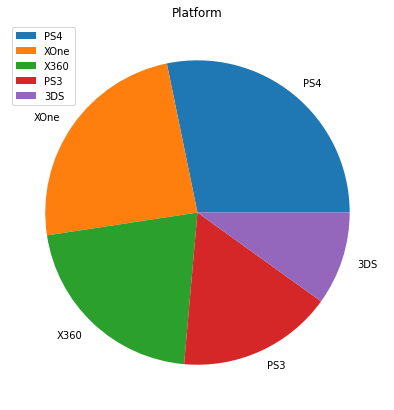

In [ ]:
top_platform_na.plot(kind='pie', subplots=True, figsize=(7, 7))#диаграмма с топ-5 платформами в NA
plt.title("Platform")
plt.ylabel("")
plt.legend(loc=2)
plt.show()

In [ ]:
top_genre_na = (
    df_new.pivot_table(index='genre', values=['na_sales'], aggfunc='sum')
    .sort_values('na_sales', ascending=False).head(5)
)#создание таблицы с топ-5 жанрами в NA
top_genre_na

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


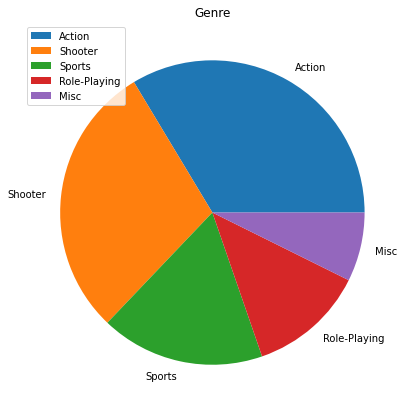

In [ ]:
top_genre_na.plot(kind='pie', subplots=True, figsize=(7, 7))#диаграмма с топ-5 жанрами в NA
plt.title("Genre")
plt.ylabel("")
plt.legend(loc=2)
plt.show()

In [ ]:
top_rating_na = (
    df_new.pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .sort_values('na_sales', ascending=False).head(5)
)#создание таблицы с топ-5 рейтингом ESRB в NA
top_rating_na

,na_sales
rating,
M,165.21
RP,89.42
E,79.05
E10+,54.24
T,49.79


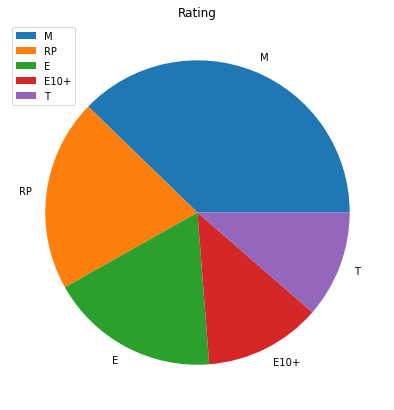

In [ ]:
top_rating_na.plot(kind='pie', subplots=True, figsize=(7, 7))#диаграмма с топ-5 рейтингом ESRB в NA
plt.title("Rating")
plt.ylabel("")
plt.show()

Самыми популярными играми в Северной Америке являются игры жанра Action и Shooter(боевики и стрелялки), возрастной категории старше 17 лет, на платформе PS4 или XOne.


### Пользователи EU

Расмотрим показатели для EU.

In [ ]:
top_platform_eu = (
    df_new.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values('eu_sales', ascending=False).head(5)
)#создание таблицы с топ-5 платформами в EU
top_platform_eu

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


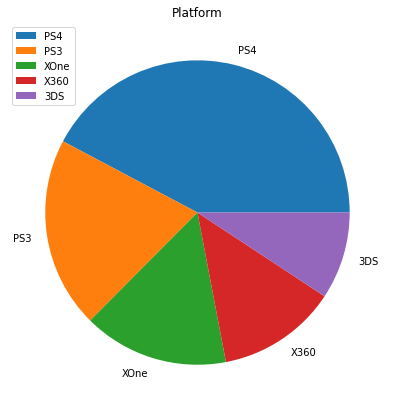

In [ ]:
top_platform_eu.plot(kind='pie', subplots=True, figsize=(7, 7))#диаграмма с топ-5 платформами в EU
plt.title("Platform")
plt.ylabel("")

plt.legend(loc=2)
plt.show()

In [ ]:
top_genre_eu = (
    df_new.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values('eu_sales', ascending=False).head(5)
)#создание таблицы с топ-5 жанрами в EU
top_genre_eu

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


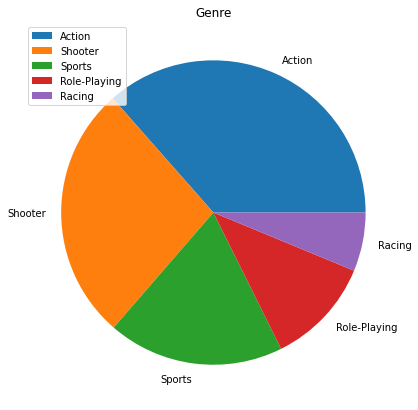

In [ ]:
top_genre_eu.plot(kind='pie', subplots=True, figsize=(7, 7))#диаграмма с топ-5 жанрами в EU
plt.title("Genre")
plt.ylabel("")

plt.legend(loc=2)
plt.show()

In [ ]:
top_rating_eu = (
    df_new.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .sort_values('eu_sales', ascending=False).head(5)
)#создание таблицы с топ-5 рейтингом ESRB в EU
top_rating_eu

,eu_sales
rating,
M,145.32
E,83.36
RP,78.91
E10+,42.69
T,41.95


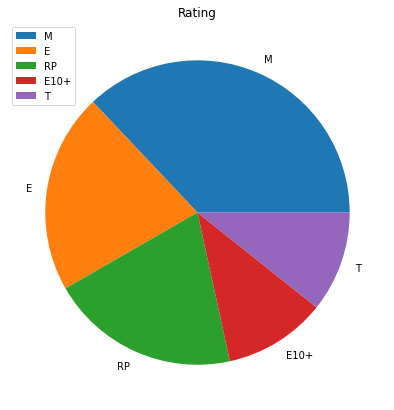

In [ ]:
top_rating_eu.plot(kind='pie', subplots=True, figsize=(7, 7))#диаграмма с топ-5 рейтингом ESRB в EU
plt.title("Rating")
plt.ylabel("")

plt.legend(loc=2)
plt.show()

Жители Европы предпочитают PS4 другим платформам. Первое место в рейтинге жанров игр со значительным отрывом от Shooter занимает Action, а самым популярным рейтингом является M - категория пользователей  старше 17 лет, на платформе PS4 или XOne.


### Пользователи JP

Посмотрим, что происходит в JP.

In [ ]:
top_platform_jp = (
    df_new.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values('jp_sales', ascending=False).head(5)
)#создание таблицы с топ-5 платформами в JP
top_platform_jp

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


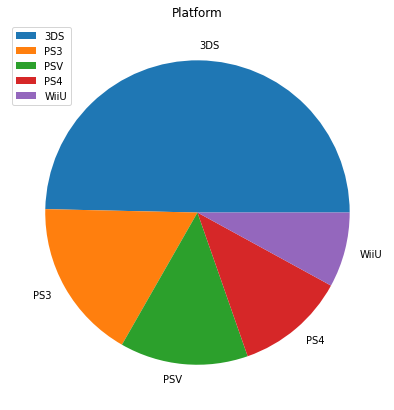

In [ ]:
top_platform_jp.plot(kind='pie', subplots=True, figsize=(7, 7))
#создание диаграммы с  топ-5 платформами в JP
plt.title("Platform")
plt.ylabel("")
plt.legend(loc=2)
plt.show()

In [ ]:
top_genre_jp = (
    df_new.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values('jp_sales', ascending=False).head(5)
)#создание таблицы с топ-5 жанрами в JP
top_genre_jp

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


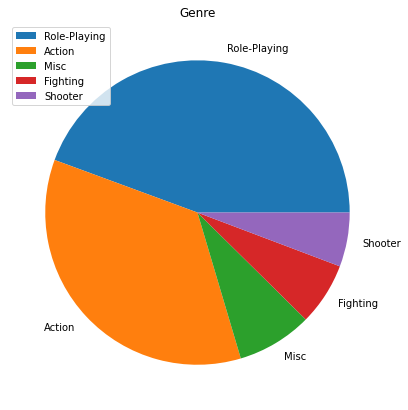

In [ ]:
top_genre_jp.plot(kind='pie', subplots=True, figsize=(7, 7))
plt.title("Genre")
plt.ylabel("")
plt.legend(loc=2)
plt.show()

In [ ]:
top_rating_jp = (
    df_new.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .sort_values('jp_sales', ascending=False).head(5)
)#создание таблицы с топ-5 рейтингом ESRB в JP
top_rating_jp

,jp_sales
rating,
RP,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


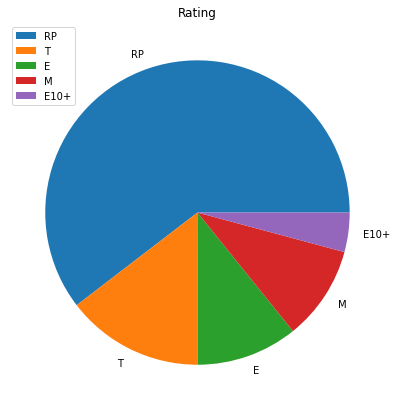

In [ ]:
top_rating_jp.plot(kind='pie', subplots=True, figsize=(7, 7))
#создание диаграммы с  топ-5 жанрами в JP
plt.title("Rating")
plt.ylabel("")
plt.legend(loc=2)
plt.show()

Жители Японии предпочитают 3DS. И примечательно, что все самые популярные платформы в Японии, принадлежат японским компаниям. Самым популярным жанром является Role-Playing.  Самым популярным рейтингом от организации ESRB в данном случае является RP т.е. не определен. Возможно, в Японии другие рейтинги?

### Пользователи прочих регионов

Дополнительно расмотрим прочие регионы в сумме.

In [ ]:
top_platform_other = (
    df_new.pivot_table(index='platform', values='other_sales', aggfunc='sum')
    .sort_values('other_sales', ascending=False).head(5)
)#создание таблицы с  топ-5 платформами в other
top_platform_other

,other_sales
platform,
PS4,48.35
PS3,26.77
XOne,14.27
X360,12.11
3DS,6.28


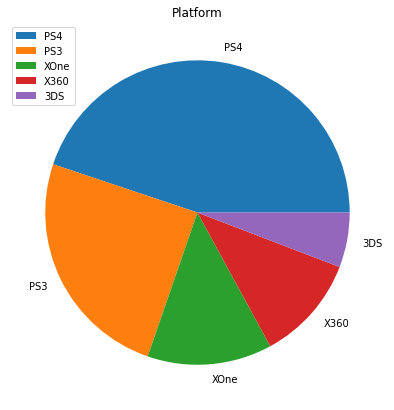

In [ ]:
top_platform_other.plot(kind='pie', subplots=True, figsize=(7, 7))
#создание диаграммы с  топ-5 платформами в JP
plt.title("Platform")
plt.ylabel("")
plt.legend(loc=2)
plt.show()

In [ ]:
top_genre_other = (
    df_new.pivot_table(index='genre', values='other_sales', aggfunc='sum')
    .sort_values('other_sales', ascending=False).head(5)
)#создание таблицы с  топ-5 жанрами в Other
top_genre_other

,other_sales
genre,
Action,37.20
Shooter,28.77
Sports,19.45
Role-Playing,11.48
Misc,6.09


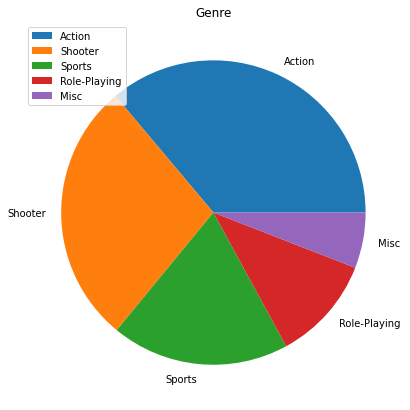

In [ ]:
top_genre_other.plot(kind='pie', subplots=True, figsize=(7, 7)) 
#создание диаграммы с  топ-5 жанрами в Other
plt.title("Genre")
plt.ylabel("")
plt.legend(loc=2)
plt.show()

In [ ]:
top_rating_other = (
    df_new.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .sort_values('jp_sales', ascending=False).head(5)
)#создание таблицы с топ-5 рейтингом ESRB в Other
top_rating_other

,jp_sales
rating,
RP,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


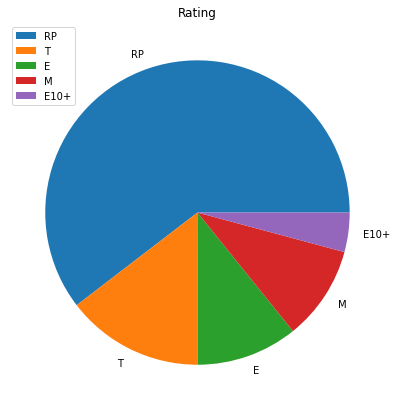

In [ ]:
top_rating_other.plot(kind='pie', subplots=True, figsize=(7, 7))
#диаграмма с топ-5 рейтингом ESRB в Other
plt.title("Rating")
plt.ylabel("")
plt.legend(loc=2)
plt.show()

По прочим регионам самой популярной платформой является `PS4`. Играют чаще всего в Боевики без определенной возрастной категории по рейтингу ESRB.

### Вывод

Мы можем наблюдать как похожи поведения игроков Северной Америки и Европы и как оно отличается от игроков в Японии. Если в Америке и Европе самыми популярными платформами Являются PlayStation-ы или Xbox-ы, то в японии Nintendo. Самый популярный жанр игр так же различается - Action для Америки и Европы, а для Японии  -  Role-Playing. Рейтинг ESRB в Европе и Северной Америке преобладает - M, т.е. подходит для лиц старше 17 лет. В Японии же рейтинг от  ESRB, в основном, не определен. Возможно, это из-за того, что в Японии пользуются системой от CERO (Computer Entertainment Rating Organization). Для прочих регионов Популярными платформами являются PlayStation, самым предпочитаемым жанром является - Action, так же как в EU и NA. А вот рейтинг, так же, как и в Японии лидирует RP.

## Проверка гипотез

### Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC равны.

Сформулируем гипотезы о равенстве средних рейтингов платформ Xbox One и PC. Из-за того, что нулевая гипотеза *H₀* всегда формулируется так, чтобы использовать знак равенства, H₀ будет звучать так:
равенства, *H₀* будет звучать так:
 - Средний рейтинг платформ платформ Xbox One и PC равны.
<br>*H₁*  будет звучать иначе:
 - Средний рейтинг платформ платформ Xbox One и PC не одинаковы.
Зададим критический уровень статистической значимости в 0,025.

In [ ]:
xbox_one = df_new.query('platform == "XOne" and user_score.notnull()')['user_score'] 

pc = df_new.query('platform == "PC" and user_score.notnull()')['user_score'] 
alpha = .025
results = st.ttest_ind(
    xbox_one, 
    pc,equal_var = False)#проверяем гипотезу о равенстве средних двух совокупностей
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу") 
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


In [ ]:
df_new.pivot_table(index='platform', values='user_score', 
                    aggfunc=np.mean).query('platform in ("XOne","PC")')
#сводная таблица со средними рейтингами

,user_score
platform,
PC,6.27
XOne,6.52


Итак, нулевую гипотезу мы отвергнуть не можем, потому что с вероятностью только в 14% такое или большее различие можно получить случайно. Это явно довольно большая вероятность, чтобы делать вывод о различии средних пользовательских рейтингах.

### Гипотеза №2: Средние пользовательские рейтинги жанров Action и Sports равны.

Сформулируем гипотезы о равенстве средних рейтингов жанров Action и Sports.*H₀* будет звучать так:
 - Средние рейтинги жанров Action и Sports равны.
<br>*H₁*  будет звучать:
 - Средние рейтинги жанров Action и Sports не одинаковы.
<br>Зададим критический уровень статистической значимости в 0,025.

In [ ]:
action = df_new.query('genre == "Action" and user_score.notnull()')['user_score'] 

pc = df_new.query('genre == "Sports" and user_score.notnull()')['user_score'] 
alpha = .025
results = st.ttest_ind(
    xbox_one, 
    pc,equal_var = False)#проверяем гипотезу о равенстве средних двух совокупностей
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу") 
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.738967231972887e-12
Отвергаем нулевую гипотезу


In [ ]:
df_new.pivot_table(index='genre', values='user_score', 
                    aggfunc=np.mean).query('genre in ("Action","Sports")')
#сводная таблица со средними рейтингами

,user_score
genre,
Action,6.84
Sports,5.24


Мы получили очень маленькое значение p-value, поэтому отвергаем *H₀*. Это значит, что пользовательские рейтинги жанров Action и Sports статистически значимо различаются.

## Общие выводы

 В результате анализа можно придти к выводу, что:
 - Самыми потенциально прибыльными платформами для всех регионов являются 'PS4', 'XOne', '3DS', 'WiiU', 'PS3','X360'.
 - Самыми популярными игровыми жанрами являются Экшны и Стрелялки.
 - На продажи, в основном, больше влияют оценки критиков, чем оценки пользователей. Однако на игры '3DS', 'WiiU' от Nintendo оценки геймеров так же имеют значимость.
Если рассматривать продажу игр в отдельных регионах, то:
 - Выгоднее всего открывать продажи в Северной Америке и Европе. Для обоих регионов картины схожи и продажи выше, чем в прочих регионах. Предпочитаемые платформы PS4 или XOne. Жанры Action и Shooter, а рейтинг от организации ESRB -  М, т.е. игры подходят для лиц старше 17 лет.
 - Для Японии ситуация немного другая. Если планировать запускать продажи для японских геймеров, то предпочтительнее выбрать платформу 3DS.Самым популярным жанром является в Японии считается -  Role-Playing. А вот рейтинги от организации ESRB там, в большинстве случаев в стране не используется.